In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import spectral
from scipy.io import loadmat
import os
from HSI_class import HSI

# Check if GPU is available
print("GPU Available:", torch.cuda.is_available())

# If available, print the GPU name
if torch.cuda.is_available():
    print("GPU Name:", torch.cuda.get_device_name(0))

GPU Available: True
GPU Name: NVIDIA GeForce GTX 1650


In [2]:
dataset_path = "Hyperspectral oil spill detection datasets"

dataset = []

for filename in os.listdir(dataset_path):
    file_path = os.path.join(dataset_path, filename)
    if os.path.isfile(file_path):  # Check if it's a file
        print(f"Processing file: {file_path}")
        hsi = HSI(file_path)
        dataset.append(hsi)

Processing file: Hyperspectral oil spill detection datasets\GM01.mat
Processing file: Hyperspectral oil spill detection datasets\GM02.mat
Processing file: Hyperspectral oil spill detection datasets\GM03.mat
Processing file: Hyperspectral oil spill detection datasets\GM04.mat
Processing file: Hyperspectral oil spill detection datasets\GM05.mat
Processing file: Hyperspectral oil spill detection datasets\GM06.mat
Processing file: Hyperspectral oil spill detection datasets\GM07.mat
Processing file: Hyperspectral oil spill detection datasets\GM08.mat
Processing file: Hyperspectral oil spill detection datasets\GM09.mat
Processing file: Hyperspectral oil spill detection datasets\GM10.mat
Processing file: Hyperspectral oil spill detection datasets\GM11.mat
Processing file: Hyperspectral oil spill detection datasets\GM12.mat
Processing file: Hyperspectral oil spill detection datasets\GM13.mat
Processing file: Hyperspectral oil spill detection datasets\GM14.mat
Processing file: Hyperspectral oil

In [7]:
for hsi in dataset:
    print(f'{hsi.name}: {hsi.img.shape}')

GM01: (1243, 684, 224)
GM02: (1786, 699, 224)
GM03: (1386, 690, 224)
GM04: (1466, 676, 224)
GM05: (2085, 682, 224)
GM06: (2088, 691, 224)
GM07: (1965, 492, 224)
GM08: (1532, 567, 224)
GM09: (1569, 517, 224)
GM10: (1084, 680, 224)
GM11: (1185, 682, 224)
GM12: (842, 640, 224)
GM13: (836, 572, 224)
GM14: (1342, 527, 224)
GM15: (1260, 523, 224)
GM16: (1033, 437, 224)
GM17: (600, 400, 224)
GM18: (1175, 563, 224)


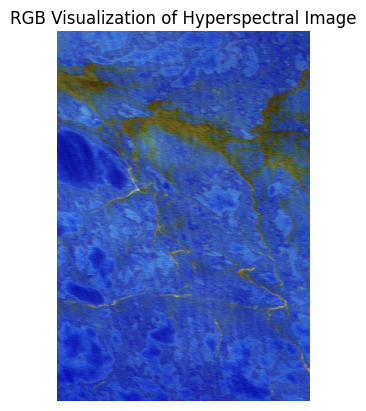

In [8]:
img = dataset[12].img
gt = dataset[12].gt
r_band = 31  # Red (around 660 nm) https://www.indexdatabase.de/db/s-single.php?id=28
g_band = 22  # Green (around 560 nm)
b_band = 10 # Blue (around 450 nm)

red_band = img[:, :, r_band]  # Adjust band index for red
green_band = img[:, :, g_band]  # Adjust band index for green
blue_band = img[:, :, b_band]  # Adjust band index for blue

# Normalize bands to range 0-1 for proper visualization
red_band = (red_band - np.min(red_band)) / (np.max(red_band) - np.min(red_band))
green_band = (green_band - np.min(green_band)) / (np.max(green_band) - np.min(green_band))
blue_band = (blue_band - np.min(blue_band)) / (np.max(blue_band) - np.min(blue_band))

rgb_image = np.stack((red_band, green_band, blue_band), axis=-1)

# Display the RGB image
plt.imshow(rgb_image)
plt.title("RGB Visualization of Hyperspectral Image")
plt.axis('off')
plt.show()

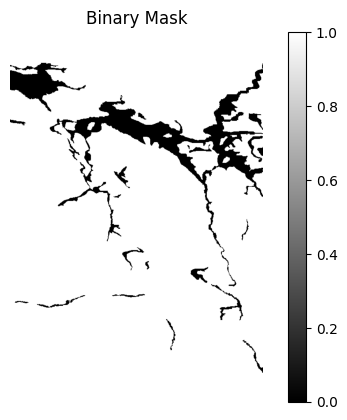

In [9]:
# Visualize the binary mask
plt.imshow(1 - gt, cmap='gray')  # Use 'gray' for binary visualization
plt.colorbar()
plt.title('Binary Mask')
plt.axis('off')
plt.show()

In [15]:
import createSample as CS
hsi_ = dataset[0]
patch_size = 9
sample_per_class = 5
selected_patch_0, selected_patch_1, random_indices_0, random_indices_1 = CS.createSample(hsi_, patch_size, sample_per_class)

hsi shape
(1243, 684, 224)
5 Randomly chosen 0 indices: [(np.int64(573), np.int64(328)), (np.int64(250), np.int64(58)), (np.int64(996), np.int64(434)), (np.int64(891), np.int64(53)), (np.int64(8), np.int64(558))]
5 Randomly chosen 1 indices: [(np.int64(146), np.int64(166)), (np.int64(150), np.int64(190)), (np.int64(887), np.int64(564)), (np.int64(305), np.int64(159)), (np.int64(167), np.int64(154))]
(1243, 684, 224)
(1251, 692, 224)
573 328 573 328
250 58 250 58
996 434 996 434
891 53 891 53
8 558 8 558
146 166 146 166
150 190 150 190
887 564 887 564
305 159 305 159
167 154 167 154
seed pixel in data class 0
[-158 -114  356  414  434  589  669  687  654  619  581  533  491  452
  427  403  381  356  331  294  268  247  225  201  178  162  149  140
  135  129  121  115  102  106   93   82   70   61   54   20   36   51
   56   22   43   47   43   41   36   18   21   31   41   38   40   37
   33   11   -3   -4  -10  -77 -101  -89   -1    6   21   28   35   37
   36   37   37   33   39   2

In [17]:
i =0
half_patch = patch_size // 2
print(hsi_.img[random_indices_0[i][0]][random_indices_0[i][1]])
print(selected_patch_0[i][half_patch][half_patch])

print(hsi_.img[random_indices_1[i][0]][random_indices_1[i][1]])
print(selected_patch_1[i][half_patch][half_patch])

[-158 -114  356  414  434  589  669  687  654  619  581  533  491  452
  427  403  381  356  331  294  268  247  225  201  178  162  149  140
  135  129  121  115  102  106   93   82   70   61   54   20   36   51
   56   22   43   47   43   41   36   18   21   31   41   38   40   37
   33   11   -3   -4  -10  -77 -101  -89   -1    6   21   28   35   37
   36   37   37   33   39   28   20   13    2  -27 -114 -107 -115 -105
  -33   -4    6    3   10    4   14   20   27   25   28   26   29   32
   24   13   21    8    4   31  -28 -104 -164    0    0    0    0    0
    0  -56  -47  -73  -75  -60  -74  -71   -8    0    9   15   22   26
   22   25   28   30   29   31   24   26   28   30   24   28   26   25
   24   20   23   18   25   15   11   13    0   -5  -39  -78  -55    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
   -9   -9    6    0    3   10  -41   21   22   17   20   29   25   31
   32   27   27   32   35   30   34   34   26   30   28   26   28   27
   32 

In [22]:
print(f"selected patch 0: {selected_patch_0.shape}")
print(f"selected patch 1: {selected_patch_1.shape}")

print(random_indices_0)
print(random_indices_1)

selected patch 0: (5, 9, 9, 224)
selected patch 1: (5, 9, 9, 224)
[(np.int64(573), np.int64(328)), (np.int64(250), np.int64(58)), (np.int64(996), np.int64(434)), (np.int64(891), np.int64(53)), (np.int64(8), np.int64(558))]
[(np.int64(146), np.int64(166)), (np.int64(150), np.int64(190)), (np.int64(887), np.int64(564)), (np.int64(305), np.int64(159)), (np.int64(167), np.int64(154))]


In [28]:
indices = random_indices_0 + random_indices_1

# Concatenating along axis 0
x_train = np.concatenate((selected_patch_0, selected_patch_1), axis=0)
y_train = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])
# Print shape to verify
print(x_train.shape)  # Expected output: (10, 9, 9, 224)
print(y_train.shape) 

print(indices)

(10, 9, 9, 224)
(10,)
[(np.int64(573), np.int64(328)), (np.int64(250), np.int64(58)), (np.int64(996), np.int64(434)), (np.int64(891), np.int64(53)), (np.int64(8), np.int64(558)), (np.int64(146), np.int64(166)), (np.int64(150), np.int64(190)), (np.int64(887), np.int64(564)), (np.int64(305), np.int64(159)), (np.int64(167), np.int64(154))]


In [34]:
# Augmentation
import augmentation as aug

n_category = 2
band_size = 224
num_per_category = 50

data_augment, label_augment = aug.Augment_data(x_train, y_train, n_category, patch_size, band_size, num_per_category)



j:  100


In [37]:
print(data_augment.shape)
print(label_augment.shape)

print(label_augment)

# Count occurrences of each unique element
counts = np.bincount(label_augment)

# Print results
for i, count in enumerate(counts):
    print(f"Element {i} occurs {count} times.")

(100, 9, 9, 224)
(100,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Element 0 occurs 50 times.
Element 1 occurs 50 times.
